In [1]:
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import resample

In [7]:
labels=pd.read_csv('unbalanced_keypoints.csv')

frequency=labels['States'].value_counts()
frequency

sleeping    700
sitting     379
running     190
Name: States, dtype: int64

Text(0, 0.5, 'Frequency')

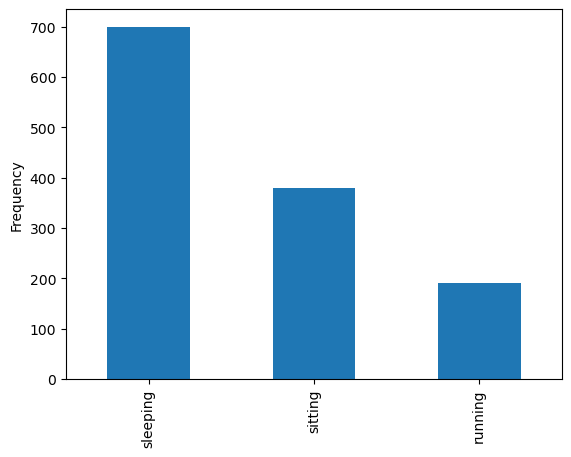

In [8]:
frequency.plot(kind='bar')
plt.ylabel('Frequency')

In [15]:
labels_majority = labels[labels["States"]=='sleeping']
labels_minority_1 = labels[labels['States']=='sitting']
labels_minority_2 = labels[labels['States']=='running'] 

In [10]:
labels_majority

,Images_name,States,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,...,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX
1,Image_4.jpg,sleeping,"[0.47366222739219666, 0.5431700348854065]","[0.43679916858673096, 0.47859910130500793]","[0.44256019592285156, 0.45258501172065735]","[0.4487518072128296, 0.4270951449871063]","[0.4201772212982178, 0.5682684183120728]","[0.41528546810150146, 0.6032377481460571]","[0.4107898473739624, 0.6357448697090149]","[0.4795711934566498, 0.3968580961227417]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Image_6.jpg,sleeping,"[0.45488613843917847, 0.6490715742111206]","[0.40640878677368164, 0.5779226422309875]","[0.41119664907455444, 0.5567144751548767]","[0.41590607166290283, 0.5346407890319824]","[0.3941495418548584, 0.601739764213562]","[0.3911033868789673, 0.5973089933395386]","[0.3879520893096924, 0.5927720665931702]","[0.43273985385894775, 0.42522597312927246]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Image_15.jpg,sleeping,"[0.5785977840423584, 0.5838626623153687]","[0.5542662143707275, 0.46520185470581055]","[0.5654186010360718, 0.43013307452201843]","[0.5768165588378906, 0.3973838686943054]","[0.5233079195022583, 0.5538627505302429]","[0.5131614208221436, 0.5789585113525391]","[0.5022835731506348, 0.6001416444778442]","[0.619694709777832, 0.33121949434280396]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Image_45.jpg,sleeping,"[0.30892884731292725, 0.49050435423851013]","[0.3071569800376892, 0.43607860803604126]","[0.3171054720878601, 0.41744062304496765]","[0.3304864466190338, 0.3943021893501282]","[0.28590190410614014, 0.47697222232818604]","[0.27898937463760376, 0.4899406135082245]","[0.2727715075016022, 0.5023618936538696]","[0.36052098870277405, 0.3688807189464569]",...,"[0.6460376381874084, 0.6114609837532043]","[0.6030653715133667, 0.782565176486969]","[0.6842599511146545, 0.45318803191185]","[0.6509680151939392, 0.8486917018890381]","[0.800071656703949, 0.6017860174179077]",NaN,"[0.8077649474143982, 0.6445704698562622]",NaN,"[0.8671525716781616, 0.6174341440200806]",NaN
7,Image_48.jpg,sleeping,"[0.5875666737556458, 0.40278205275535583]","[0.5873888731002808, 0.41061434149742126]","[0.5842195749282837, 0.41846001148223877]","[0.5811726450920105, 0.42634230852127075]","[0.5864806175231934, 0.38914650678634644]","[0.582197904586792, 0.38235485553741455]","[0.5786521434783936, 0.37478208541870117]","[0.5325809717178345, 0.4374242126941681]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,Image_12462.jpg,sleeping,"[0.4679306149482727, 0.2329375296831131]","[0.524314284324646, 0.2175779640674591]","[0.5406056046485901, 0.2236192226409912]","[0.5550684332847595, 0.22902873158454895]","[0.48265814781188965, 0.20112961530685425]","[0.4733797609806061, 0.19680988788604736]","[0.4663175046443939, 0.19307881593704224]","[0.5867099761962891, 0.25016552209854126]",...,"[0.5274918079376221, 0.6603097915649414]","[0.32603031396865845, 0.6427481174468994]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259,Image_12479.jpg,sleeping,"[0.5335425138473511, 0.4480625092983246]","[0.49003902077674866, 0.38465261459350586]","[0.4938901662826538, 0.35533851385116577]","[0.4985790550708771, 0.32611435651779175]","[0.4741469919681549, 0.471244215965271]","[0.4653494954109192, 0.5000350475311279]","[0.4552125334739685, 0.5268605947494507]","[0.5127100348472595, 0.27565333247184753]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260,Image_12496.jpg,sleeping,"[0.7083108425140381, 0.15883904695510864]","[0.7053921222686768, 0.14198315143585205]","[0.7054040431976318, 0.14181271195411682]","[0.7053873538970947, 0.14156633615493774]","[0.6975995302200317, 0.13972458243370056]","[0.6913449168205261, 0.1382170021533966]","[0.6847823262214661, 0.13685017824172974]","[0.6711857914924622, 0.14194172620773315]",...,"[0.483211636

In [11]:
labels_minority_1

,Images_name,States,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,...,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX
0,Image_1.jpg,sitting,"[0.39147910475730896, 0.23294000327587128]","[0.4134518802165985, 0.18742293119430542]","[0.4289328455924988, 0.1861588954925537]","[0.44175004959106445, 0.18479949235916138]","[0.3725893795490265, 0.18777894973754883]","[0.36201363801956177, 0.187644362449646]","[0.35410383343696594, 0.18751120567321777]","[0.4716053903102875, 0.19623422622680664]",...,"[0.46724218130111694, 0.9707058668136597]","[0.3094317615032196, 0.9020289182662964]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Image_33.jpg,sitting,"[0.5450084209442139, 0.25249677896499634]","[0.5408573150634766, 0.22310443222522736]","[0.5413497090339661, 0.22348354756832123]","[0.541824996471405, 0.22380846738815308]",NaN,"[0.5252975821495056, 0.21841007471084595]","[0.5176609754562378, 0.21672897040843964]","[0.5201491713523865, 0.23134106397628784]",...,"[0.5101232528686523, 0.6656566858291626]","[0.4058215022087097, 0.6848208904266357]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Image_62.jpg,sitting,"[0.26648464798927307, 0.11042512208223343]","[0.27319127321243286, 0.09502914547920227]","[0.2777671813964844, 0.09580529481172562]","[0.28229790925979614, 0.09672883152961731]","[0.25877130031585693, 0.09386543184518814]","[0.25332897901535034, 0.0939781442284584]","[0.24817465245723724, 0.09405958652496338]","[0.2878037691116333, 0.10647961497306824]",...,"[0.3425014615058899, 0.39850911498069763]","[0.28273680806159973, 0.417121559381485]","[0.4089870750904083, 0.24634414911270142]","[0.3373037576675415, 0.40476882457733154]","[0.41005510091781616, 0.4617413282394409]","[0.32859325408935547, 0.6741872429847717]","[0.3811156451702118, 0.5197959542274475]","[0.3138599395751953, 0.6963871717453003]","[0.42507582902908325, 0.5386644601821899]","[0.3405410051345825, 0.7417381405830383]"
21,Image_195.jpg,sitting,"[0.2696598768234253, 0.19044703245162964]","[0.2612110674381256, 0.1715691089630127]","[0.26089534163475037, 0.17095878720283508]","[0.2603848874568939, 0.1702379286289215]","[0.256609171628952, 0.1736336052417755]","[0.2524700164794922, 0.1747908890247345]","[0.24811524152755737, 0.17582066357135773]","[0.24134421348571777, 0.18339821696281433]",...,"[0.3038012683391571, 0.5844191312789917]","[0.27011674642562866, 0.630224347114563]","[0.4884181320667267, 0.5947573184967041]","[0.4403832256793976, 0.47986990213394165]","[0.5539527535438538, 0.8615561723709106]","[0.5163788199424744, 0.5811070799827576]","[0.539592444896698, 0.9043837785720825]",NaN,"[0.636260986328125, 0.9110185503959656]","[0.5933926105499268, 0.5711312294006348]"
22,Image_201.jpg,sitting,"[0.38972342014312744, 0.4213007390499115]","[0.40225622057914734, 0.39884933829307556]","[0.4075118601322174, 0.40032729506492615]","[0.4119047522544861, 0.4014230966567993]","[0.38206547498703003, 0.3892975151538849]","[0.37283939123153687, 0.3840163052082062]","[0.362531453371048, 0.3781684935092926]","[0.4033195376396179, 0.3983328938484192]",...,"[0.39162304997444153, 0.7937852740287781]","[0.2929304242134094, 0.8283390998840332]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Image_12502.jpg,sitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1262,Image_12511.jpg,sitting,"[0.5720220804214478, 0.19826389849185944]","[0.5790799856185913, 0.1792999505996704]","[0.5848280191421509, 0.17939314246177673]","[0.5897597670555115, 0.17968083918094635]",NaN,"[0.5544591546058655, 0.18091532588005066]","[0.5498575568199158, 0.18263578414916992]","[0.5952705144882202, 0.19089022278785706]",...,"[0.6105743646621704, 0.5658798813819885]","[0.5332093238830566, 0.5562417507171631]","[0.696878969669342, 0.5957417488098145]","[0.479382187128067, 0.5549168586730957]","[0.6102216243743

In [16]:
labels_minority_2

,Images_name,States,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,...,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX
5,Image_37.jpg,running,"[0.38629814982414246, 0.17646420001983643]","[0.41411563754081726, 0.1519491970539093]","[0.431474506855011, 0.15202850103378296]","[0.44878819584846497, 0.15245717763900757]","[0.37971827387809753, 0.15233495831489563]","[0.3727894127368927, 0.1523340344429016]","[0.36581429839134216, 0.1522502303123474]","[0.4857577383518219, 0.16266989707946777]",...,"[0.5666353702545166, 0.5855498909950256]","[0.39655354619026184, 0.5982723832130432]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Image_75.jpg,running,"[0.806694507598877, 0.12368068099021912]","[0.8187100291252136, 0.10171768814325333]","[0.8262200951576233, 0.09969115257263184]","[0.8341254591941833, 0.09796059131622314]","[0.8005911707878113, 0.10474619269371033]","[0.795140266418457, 0.10501366853713989]","[0.7913545370101929, 0.10533150285482407]","[0.8511082530021667, 0.10454067587852478]",...,"[0.8849347829818726, 0.5369717478752136]","[0.7958803772926331, 0.5307532548904419]","[0.8831967711448669, 0.7909655570983887]","[0.8065717816352844, 0.7718344330787659]",NaN,"[0.8085392713546753, 0.9868769645690918]",NaN,NaN,NaN,"[0.8278321623802185, 1.0861210823059082]"
20,Image_183.jpg,running,"[0.3244328796863556, 0.2823904752731323]","[0.32725411653518677, 0.2715851962566376]","[0.3274501860141754, 0.2721996605396271]","[0.32759666442871094, 0.2727719247341156]","[0.3287912607192993, 0.27007409930229187]","[0.3301537036895752, 0.2697349488735199]","[0.3315884470939636, 0.2693791687488556]","[0.33500272035598755, 0.28032219409942627]",...,"[0.3654496967792511, 0.5507192015647888]","[0.3603784739971161, 0.5478185415267944]","[0.4107396900653839, 0.6922369599342346]",NaN,"[0.5190359354019165, 0.6849532127380371]","[0.30227434635162354, 0.8263511657714844]","[0.5312691330909729, 0.6707208752632141]","[0.30579617619514465, 0.8599081635475159]","[0.5512964725494385, 0.734599769115448]","[0.25878989696502686, 0.8359424471855164]"
24,Image_218.jpg,running,"[0.58600252866745, 0.2701416015625]","[0.5859254598617554, 0.2562382221221924]","[0.5868527889251709, 0.2562348544597626]","[0.5877590179443359, 0.2562642991542816]","[0.5814075469970703, 0.25564834475517273]","[0.5784846544265747, 0.255171000957489]","[0.5751408338546753, 0.25465908646583557]","[0.5841246843338013, 0.26058724522590637]",...,"[0.5819392204284668, 0.5463992953300476]","[0.5451847910881042, 0.5433730483055115]","[0.5619165301322937, 0.6885581016540527]","[0.5774574875831604, 0.6869422197341919]",NaN,"[0.5960192680358887, 0.8631969690322876]",NaN,"[0.5947549343109131, 0.8843997120857239]",NaN,"[0.6147234439849854, 0.9178312420845032]"
26,Image_228.jpg,running,"[0.684114396572113, 0.1683812141418457]","[0.6795740723609924, 0.15770429372787476]","[0.6801171898841858, 0.15790718793869019]","[0.6806468963623047, 0.15808942914009094]","[0.6744504570960999, 0.1586468517780304]","[0.6712905764579773, 0.1595642864704132]","[0.6677446365356445, 0.1606455147266388]","[0.6720978617668152, 0.17116320133209229]",...,"[0.6622202396392822, 0.5517002940177917]","[0.6288841366767883, 0.5428705215454102]",NaN,"[0.6912550926208496, 0.7257163524627686]","[0.5260359644889832, 0.8020848035812378]","[0.7229658961296082, 0.9519497156143188]","[0.5058590173721313, 0.7919411659240723]","[0.7190579771995544, 0.9765742421150208]","[0.5215542316436768, 0.8902251720428467]","[0.762762725353241, 0.9832115173339844]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Image_12258.jpg,running,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1236,Image_12262.jpg,running,"[0.38168445229530334, 0.2712913751602173]","[0.37182825803756714, 0.24357260763645172]","[0.3704134523868561, 0.24389870464801788]","[0.36881452798843384, 0.2447348237037

In [17]:
labels_majority.shape , labels_minority_1.shape , labels_minority_2.shape

((700, 35), (379, 35), (190, 35))

In [19]:
labels_minority_1_upsampled= resample(labels_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=123) 
labels_minority_2_upsampled= resample(labels_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=123)

In [20]:
balanced_keypoints= pd.concat([labels_majority, labels_minority_1_upsampled, labels_minority_2_upsampled])

In [21]:
balanced_keypoints

,Images_name,States,NOSE,LEFT_EYE_INNER,LEFT_EYE,LEFT_EYE_OUTER,RIGHT_EYE_INNER,RIGHT_EYE,RIGHT_EYE_OUTER,LEFT_EAR,...,LEFT_HIP,RIGHT_HIP,LEFT_KNEE,RIGHT_KNEE,LEFT_ANKLE,RIGHT_ANKLE,LEFT_HEEL,RIGHT_HEEL,LEFT_FOOT_INDEX,RIGHT_FOOT_INDEX
1,Image_4.jpg,sleeping,"[0.47366222739219666, 0.5431700348854065]","[0.43679916858673096, 0.47859910130500793]","[0.44256019592285156, 0.45258501172065735]","[0.4487518072128296, 0.4270951449871063]","[0.4201772212982178, 0.5682684183120728]","[0.41528546810150146, 0.6032377481460571]","[0.4107898473739624, 0.6357448697090149]","[0.4795711934566498, 0.3968580961227417]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Image_6.jpg,sleeping,"[0.45488613843917847, 0.6490715742111206]","[0.40640878677368164, 0.5779226422309875]","[0.41119664907455444, 0.5567144751548767]","[0.41590607166290283, 0.5346407890319824]","[0.3941495418548584, 0.601739764213562]","[0.3911033868789673, 0.5973089933395386]","[0.3879520893096924, 0.5927720665931702]","[0.43273985385894775, 0.42522597312927246]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Image_15.jpg,sleeping,"[0.5785977840423584, 0.5838626623153687]","[0.5542662143707275, 0.46520185470581055]","[0.5654186010360718, 0.43013307452201843]","[0.5768165588378906, 0.3973838686943054]","[0.5233079195022583, 0.5538627505302429]","[0.5131614208221436, 0.5789585113525391]","[0.5022835731506348, 0.6001416444778442]","[0.619694709777832, 0.33121949434280396]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Image_45.jpg,sleeping,"[0.30892884731292725, 0.49050435423851013]","[0.3071569800376892, 0.43607860803604126]","[0.3171054720878601, 0.41744062304496765]","[0.3304864466190338, 0.3943021893501282]","[0.28590190410614014, 0.47697222232818604]","[0.27898937463760376, 0.4899406135082245]","[0.2727715075016022, 0.5023618936538696]","[0.36052098870277405, 0.3688807189464569]",...,"[0.6460376381874084, 0.6114609837532043]","[0.6030653715133667, 0.782565176486969]","[0.6842599511146545, 0.45318803191185]","[0.6509680151939392, 0.8486917018890381]","[0.800071656703949, 0.6017860174179077]",NaN,"[0.8077649474143982, 0.6445704698562622]",NaN,"[0.8671525716781616, 0.6174341440200806]",NaN
7,Image_48.jpg,sleeping,"[0.5875666737556458, 0.40278205275535583]","[0.5873888731002808, 0.41061434149742126]","[0.5842195749282837, 0.41846001148223877]","[0.5811726450920105, 0.42634230852127075]","[0.5864806175231934, 0.38914650678634644]","[0.582197904586792, 0.38235485553741455]","[0.5786521434783936, 0.37478208541870117]","[0.5325809717178345, 0.4374242126941681]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,Image_7816.jpg,running,"[0.5172596573829651, 0.3595224618911743]","[0.5194735527038574, 0.3462989330291748]","[0.5218575596809387, 0.34652799367904663]","[0.5240473747253418, 0.34672194719314575]","[0.5116231441497803, 0.3452453911304474]","[0.5076557397842407, 0.3447425067424774]","[0.5036295056343079, 0.3445564806461334]","[0.5233352184295654, 0.35046011209487915]",...,"[0.5204715132713318, 0.6046167612075806]","[0.47698625922203064, 0.6070719957351685]","[0.5316675305366516, 0.7327350378036499]","[0.47529175877571106, 0.7389580011367798]","[0.5109624266624451, 0.8628597855567932]","[0.4655398726463318, 0.8570048809051514]","[0.5005625486373901, 0.8803330659866333]",NaN,"[0.5283828377723694, 0.9075114130973816]","[0.48086491227149963, 0.9065208435058594]"
471,Image_4599.jpg,running,"[0.5031450986862183, 0.18741756677627563]","[0.5119484663009644, 0.16573229432106018]","[0.5186952948570251, 0.16551196575164795]","[0.524561882019043, 0.16569404304027557]","[0.4925002157688141, 0.16703346371650696]","[0.48568132519721985, 0.16756033897399902]","[0.4808998107910156, 0.16829191148281097]",NaN,...,"[0.5504920482635498, 0.6337949633598328]","[0.4509076476097107, 0.63734370470047]","[0.5273459553718567, 0.9144222736358643]","[0.4664195477962494, 0.9206355214118958]",NaN,NaN,NaN,NaN,NaN,NaN
169,Image_151

Text(0, 0.5, 'Updated Frequency')

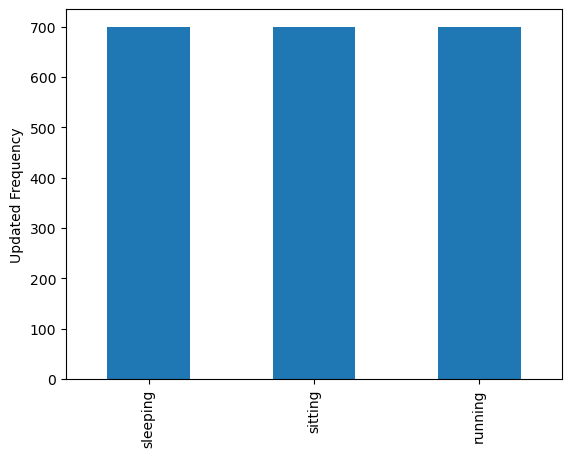

In [22]:
frequency_2=balanced_keypoints['States'].value_counts()
frequency_2.plot(kind='bar')
plt.ylabel('Updated Frequency')

In [23]:
balanced_keypoints.to_csv('balanced_keypoints.csv', index=False)